# Best US Cities for Music

The goal of this notebook is to use Foursquare in order to try to come up with quantitative data in order to compare US cities based on their music scenes

In [1]:
# Install and import the necessary libraries for this task
get_ipython().system(u' pip install beautifulsoup4')
!pip install lxml
!pip install beautifulsoup4 as bs4
!pip install folium
!pip install geocoder

from lxml import html
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import math
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
import folium
import json
import requests
import geocoder
from geopy.geocoders import Nominatim
import branca
import branca.colormap as cm
print('Libraries successfully imported')

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=d33ccc81a302dbb0705cb84716700968fe140590e5edefd5baf6964b1969275f
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
     |████████████████████████████████| 93 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 9.5 MB/s  eta 0:00:01
Libraries successfully imported


In [2]:
# set a variable as the URL of the site the data will be taken from
url="https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
# use urllib and BeautifulSoup in order to open and copy the html code of the webpage to another variable
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')
# use soup.find in order to pull out only the html code related to the data wanted
pop_table = soup.find('table', class_='wikitable sortable')

A = []
B = []
C = []
D = []
E = []
F = []
G = []
H = []
I = []
J = []
K = []
L = []

for row in pop_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 11:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        #C.append(cells[2].find(text=True))
        C_find=str(cells[2].find('a'))
        start = C_find.find(">")
        end = C_find.find('<',start)
        if str(C_find[start+1:end]) != 'Non':
            C.append(str(C_find[start+1:end]))       
        else:
            C_find = str(cells[2])
            start = C_find.find("span>",-25)
            end = C_find.find("</td>", start)
            #C.append(str(C_find[start-10:start+5]))
            C.append(str(C_find[start+5:end]))

        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
        F.append(cells[5].find(text=True))
        G.append(cells[6].find(text=True))
        H.append(cells[7].find(text=True))
        I.append(cells[8].find(text=True))
        J.append(cells[9].find(text=True))
        #K_find=cells[10].find('a')
        #K.append(str(K_find))
        K_find=str(cells[10].find('a'))
        start = K_find.find('"geo"')
        end = K_find.find('-',start)
        K.append(str(K_find[start+6:end-2]))
        L_find=str(cells[10].find('a'))
        start = L_find.find('"geo"')
        end = L_find.find('<',start)
        L.append(str(L_find[start+15:end]))

df = pd.DataFrame(A,columns = ['Rank'])
df['City'] = B
df['State'] = C
df['2019 Estimate'] = D
df['2010 Census'] = E
df['Change'] = F
df['Area (sq mi)'] = G
df['Area (km$^2$)'] = H
df['Density'] = I
df['Density (per km$^2$)'] = J
df['Latitude'] = K
df['Longitude'] = L


top_50_df = df.head(50)
top_50_df.head()

,Rank,City,State,2019 Estimate,2010 Census,Change,Area (sq mi),Area (km$^2$),Density,Density (per km$^2$),Latitude,Longitude
0,1\n,New York City,New York,"8,336,817\n","8,175,133\n",+1.98%,301.5 sq mi\n,780.9 km,"28,317/sq mi\n","10,933/km",40.6635,-73.9387
1,2\n,Los Angeles,California,"3,979,576\n","3,792,621\n",+4.93%,468.7 sq mi\n,"1,213.9 km","8,484/sq mi\n","3,276/km",34.0194,-118.4108
2,3\n,Chicago,Illinois,"2,693,976\n","2,695,598\n",−0.06%,227.3 sq mi\n,588.7 km,"11,900/sq mi\n","4,600/km",41.8376,-87.6818
3,4\n,Houston,Texas,"2,320,268\n","2,100,263\n",+10.48%,637.5 sq mi\n,"1,651.1 km","3,613/sq mi\n","1,395/km",29.7866,-95.3909
4,5\n,Phoenix,Arizona,"1,680,992\n","1,445,632\n",+16.28%,517.6 sq mi\n,"1,340.6 km","3,120/sq mi\n","1,200/km",33.5722,-112.0901


In [3]:
# deletes unneccessary characters copied from html
top_50_df = top_50_df.replace('\n','', regex=True)
top_50_df = top_50_df.replace('/km','', regex=True)
top_50_df = top_50_df.replace('km','', regex=True)
top_50_df = top_50_df.replace(',','', regex=True)


# drop data that shouldn't be necessary
top_50_df.drop(['2010 Census','Change','Area (sq mi)','Density'], axis = 1, inplace = True)

top_50_df['Rank'] = top_50_df['Rank'].astype(int)
top_50_df['2019 Estimate'] = top_50_df['2019 Estimate'].astype(int)
top_50_df['Area (km$^2$)'] = top_50_df['Area (km$^2$)'].astype(float)
top_50_df['Density (per km$^2$)'] = top_50_df['Density (per km$^2$)'].astype(float)
top_50_df['Latitude'] = top_50_df['Latitude'].astype(float)
top_50_df['Longitude'] = top_50_df['Longitude'].astype(float)
top_50_df.head()

,Rank,City,State,2019 Estimate,Area (km$^2$),Density (per km$^2$),Latitude,Longitude
0,1,New York City,New York,8336817,780.9,10933.0,40.6635,-73.9387
1,2,Los Angeles,California,3979576,1213.9,3276.0,34.0194,-118.4108
2,3,Chicago,Illinois,2693976,588.7,4600.0,41.8376,-87.6818
3,4,Houston,Texas,2320268,1651.1,1395.0,29.7866,-95.3909
4,5,Phoenix,Arizona,1680992,1340.6,1200.0,33.5722,-112.0901


In [4]:
address = 'United States'

geolocator = Nominatim(user_agent="ny_explorer")
location_US = geolocator.geocode(address)
latitude_US = location_US.latitude
longitude_US = location_US.longitude
#print('The geograpical coordinate of The United States are {}, {}.'.format(latitude, longitude))

map_US = folium.Map(location=[latitude_US, longitude_US], zoom_start=4)

for lat, lng, city, state in zip(top_50_df['Latitude'], top_50_df['Longitude'], top_50_df['City'], top_50_df['State']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
map_US

Upon inspection of the above map, many of the markers are set in locations far from the cities' epicenters where data may not be representative of the city. The arcgis geocoder will be used as comparison to see if it would provide better locations.

In [5]:
latitude = []
longitude = []
for city, state in zip(top_50_df['City'],top_50_df['State']):
    # initialize your variable to None
    lat_lng_coords = None
# loop until you get the coordinates
    while(lat_lng_coords is None):
        # Important to have both city and state for search, Arlington, VA comes up otherwise
        g = geocoder.arcgis('{}, {}'.format(city,state))
        lat_lng_coords = g.latlng
        print(city, state)
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

New York City New York
Los Angeles California
Chicago Illinois
Houston Texas
Phoenix Arizona
Philadelphia Pennsylvania
San Antonio Texas
San Diego California
Dallas Texas
San Jose California
Austin Texas
Jacksonville Florida
Fort Worth Texas
Columbus Ohio
Charlotte North Carolina
San Francisco California
Indianapolis Indiana
Seattle Washington
Denver Colorado
Washington District of Columbia
Boston Massachusetts
El Paso Texas
Nashville Tennessee
Detroit Michigan
Oklahoma City Oklahoma
Portland Oregon
Las Vegas Nevada
Memphis Tennessee
Louisville Kentucky
Baltimore Maryland
Milwaukee Wisconsin
Albuquerque New Mexico
Tucson Arizona
Fresno California
Mesa Arizona
Sacramento California
Atlanta Georgia
Kansas City Missouri
Colorado Springs Colorado
Omaha Nebraska
Raleigh North Carolina
Miami Florida
Long Beach California
Virginia Beach Virginia
Oakland California
Minneapolis Minnesota
Tulsa Oklahoma
Tampa Florida
Arlington Texas
New Orleans Louisiana


In [33]:
top_50_df_2 = top_50_df
top_50_df_2['Latitude']=latitude
top_50_df_2['Longitude']=longitude
top_50_df=df.head(50)
top_50_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Rank,City,State,2019 Estimate,2010 Census,Change,Area (sq mi),Area (km$^2$),Density,Density (per km$^2$),Latitude,Longitude
0,1\n,New York City,New York,"8,336,817\n","8,175,133\n",+1.98%,301.5 sq mi\n,780.9 km,"28,317/sq mi\n","10,933/km",40.6635,-73.9387
1,2\n,Los Angeles,California,"3,979,576\n","3,792,621\n",+4.93%,468.7 sq mi\n,"1,213.9 km","8,484/sq mi\n","3,276/km",34.0194,-118.4108
2,3\n,Chicago,Illinois,"2,693,976\n","2,695,598\n",−0.06%,227.3 sq mi\n,588.7 km,"11,900/sq mi\n","4,600/km",41.8376,-87.6818
3,4\n,Houston,Texas,"2,320,268\n","2,100,263\n",+10.48%,637.5 sq mi\n,"1,651.1 km","3,613/sq mi\n","1,395/km",29.7866,-95.3909
4,5\n,Phoenix,Arizona,"1,680,992\n","1,445,632\n",+16.28%,517.6 sq mi\n,"1,340.6 km","3,120/sq mi\n","1,200/km",33.5722,-112.0901
5,6\n,Philadelphia,Pennsylvania,"1,584,064\n","1,526,006\n",+3.80%,134.2 sq mi\n,347.6 km,"11,683/sq mi\n","4,511/km",40.0094,-75.1333
6,7\n,San Antonio,Texas\n,"1,547,253\n","1,327,407\n",+16.56%,461.0 sq mi\n,"1,194.0 km","3,238/sq mi\n","1,250/km",29.4724,-98.5251
7,8\n,San Diego,California\n,"1,423,851\n","1,307,402\n",+8.91%,325.2 sq mi\n,842.3 km,"4,325/sq mi\n","1,670/km",32.8153,-117.1350
8,9\n,Dallas,Texas\n,"1,343,573\n","1,197,816\n",+12.17%,340.9 sq mi\n,882.9 km,"3,866/sq mi\n","1,493/km",32.7933,-96.7665
9,10\n,San Jose,California\n,"1,021,795\n","945,942\n",+8.02%,177.5 sq mi\n,459.7 km,"5,777/sq mi\n","2,231/km",37.2967,-121.8189


In [7]:
map_US = folium.Map(location=[latitude_US, longitude_US], zoom_start=4)

for lat, lng, city, state in zip(top_50_df['Latitude'], top_50_df['Longitude'], top_50_df['City'], top_50_df['State']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
for lat2, lng2, city2, state2 in zip(top_50_df_2['Latitude'], top_50_df_2['Longitude'], top_50_df_2['City'], top_50_df_2['State']):
    label2 = '{}, {}'.format(city2, state2)
    label2 = folium.Popup(label2, parse_html=True)
    folium.CircleMarker(
        [lat2, lng2],
        radius=5,
        popup=label2,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US) 
    
map_US

The location values from the arcgis geocoder appear to identify the downtown areas of the cities better than the Wikipedia values and so the geocoder values will be used going forward.

In [8]:
pop_df = top_50_df_2

In [9]:
# The code was removed by Watson Studio for sharing.

In [36]:
Radius = []
for a in pop_df['Area (km$^2$)']:
    Radius.append(1000*math.sqrt(a/math.pi))

pop_df['Radius (m)'] = Radius

pop_df.head()

,Rank,City,State,2019 Estimate,Area (km$^2$),Density (per km$^2$),Latitude,Longitude,Radius (m)
0,1,New York City,New York,8336817,780.9,10933.0,40.71455,-74.00714,15766.045481
1,2,Los Angeles,California,3979576,1213.9,3276.0,34.05361,-118.24550,19656.967488
2,3,Chicago,Illinois,2693976,588.7,4600.0,41.88425,-87.63245,13689.011286
3,4,Houston,Texas,2320268,1651.1,1395.0,29.76078,-95.36952,22925.127111
4,5,Phoenix,Arizona,1680992,1340.6,1200.0,33.44825,-112.07580,20657.353011


In [11]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng, 
            VERSION, 
            search_query, 
            rad, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [69]:
rad = 1500

music_venues = getNearbyVenues(names = pop_df['City'],
                                   latitudes = pop_df['Latitude'],
                                   longitudes = pop_df['Longitude']
                                  )

New York City
Los Angeles
Chicago
Houston
Phoenix
Philadelphia
San Antonio
San Diego
Dallas
San Jose
Austin
Jacksonville
Fort Worth
Columbus
Charlotte
San Francisco
Indianapolis
Seattle
Denver
Washington
Boston
El Paso
Nashville
Detroit
Oklahoma City
Portland
Las Vegas
Memphis
Louisville
Baltimore
Milwaukee
Albuquerque
Tucson
Fresno
Mesa
Sacramento
Atlanta
Kansas City
Colorado Springs
Omaha
Raleigh
Miami
Long Beach
Virginia Beach
Oakland
Minneapolis
Tulsa
Tampa
Arlington
New Orleans


In [70]:
print(music_venues.shape)
music_venues_count = music_venues.groupby('City').count()
music_venues_count.drop(['City Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category'], axis = 1, inplace = True)
music_venues_count.rename(columns = {"City":"Name","City Latitude":"Venues"}, inplace = True)

merge_df = music_venues_count.join(pop_df.set_index('City'), on='City')
merge_df['Venues per km$^2$'] = merge_df['Venues']/(math.pi*1.5**2)
merge_df['Venues per 1000'] = 1000*merge_df['Venues per km$^2$']/merge_df['Density (per km$^2$)']

merge_df = merge_df[['State','2019 Estimate','Venues','Density (per km$^2$)','Venues per km$^2$','Venues per 1000','Latitude','Longitude']]
merge_df.sort_values(by=['Venues per 1000'], ascending = False, inplace = True)
merge_df.reset_index(inplace = True)
print(pop_df.shape)
print(merge_df.shape)
print(music_venues_count.shape)

merge_df

(976, 7)
(50, 9)
(49, 9)
(49, 1)


,City,State,2019 Estimate,Venues,Density (per km$^2$),Venues per km$^2$,Venues per 1000,Latitude,Longitude
0,Nashville,Tennessee,670820,43,536.0,6.083256,11.349357,36.16784,-86.77816
1,Austin,Texas,978908,88,1170.0,12.449453,10.640558,30.26759,-97.74299
2,New Orleans,Louisiana,390144,55,892.0,7.780908,8.722991,29.95370,-90.07775
3,Jacksonville,Florida,911507,15,455.0,2.122066,4.663881,30.33147,-81.65622
4,Kansas City,Missouri,495327,15,590.0,2.122066,3.596722,39.10344,-94.58311
5,Oklahoma City,Oklahoma,655057,10,407.0,1.414711,3.475947,35.47203,-97.52107
6,Dallas,Texas,1343573,33,1493.0,4.668545,3.126956,32.77822,-96.79512
7,Memphis,Tennessee,651073,17,794.0,2.405008,3.028977,35.14976,-90.04925
8,Denver,Colorado,727211,33,1746.0,4.668545,2.673852,39.74001,-104.99202
9,Tampa,Florida,399700,19,1284.0,2.687950,2.093419,27.94653,-82.45927


In [72]:
list_df = merge_df[['City','State','Venues per 1000']]
list_df.describe()

,Venues per 1000
count,49.000000
mean,1.954687
std,2.337551
min,0.261714
25%,0.916138
50%,1.251956
75%,1.853839
max,11.349357


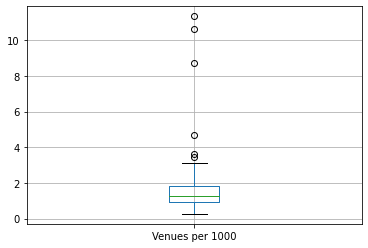

In [73]:
list_df.boxplot(column = ['Venues per 1000'])

In [74]:
list_df['Rank']=list_df['Venues per 1000'].rank(ascending = 0)
list_df['Rank'] = list_df['Rank'].astype(int)
final_list_df = list_df.set_index(['Rank']).head(10)
final_list_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,City,State,Venues per 1000
Rank,,,
1,Nashville,Tennessee,11.349357
2,Austin,Texas,10.640558
3,New Orleans,Louisiana,8.722991
4,Jacksonville,Florida,4.663881
5,Kansas City,Missouri,3.596722
6,Oklahoma City,Oklahoma,3.475947
7,Dallas,Texas,3.126956
8,Memphis,Tennessee,3.028977
9,Denver,Colorado,2.673852


In [76]:
# normalize data between 0 and 1
merge_df['norm'] = (merge_df['Venues per 1000'])/(merge_df['Venues per 1000']).max()

music_map_US = folium.Map(location=[latitude_US, longitude_US], zoom_start=4)
colormap = cm.LinearColormap(colors=['lightgreen','darkgreen'], index=[0,1])


for lat, lng, city, state, venues, n in zip(merge_df['Latitude'], merge_df['Longitude'], merge_df['City'], merge_df['State'], merge_df['Venues per 1000'], merge_df['norm']):
    label = '{}, {} {:0.2f} venues per 1000 people'.format(city, state, venues)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=math.sqrt(n)*8,
        popup=label,
        color=colormap(n),
        alpha=n,
        fill=True,
        fill_opacity=1,
        parse_html=False).add_to(music_map_US) 
    
music_map_US